<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Logisitc_regression_practice_abhiram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMULATION OF LOGISTIC FUNCTION**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





In [34]:
def sigmoid(x):
  return 1/(1+np.e**-x)


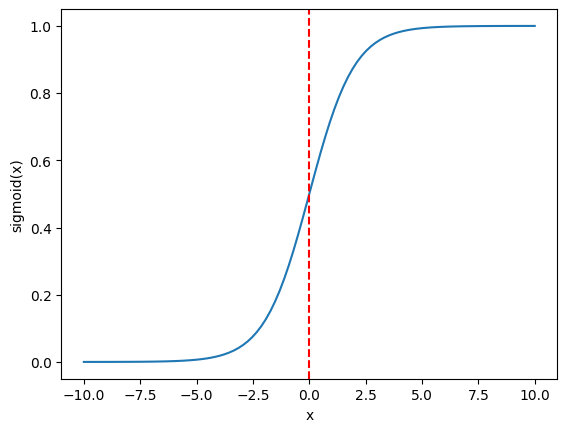

In [35]:
#Generate data for plotting sigmoid function

x = np.linspace(-10,10,100)
z = sigmoid(x)

#Plot sigmoid function
plt.plot(x,z,label ="sigmoid function")

#Plot a vertical line at zero
plt.axvline(x=0,color='r',linestyle='--',label ='vertical line at zero')

#labelling the plot
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.legend
plt.show()

**Negative Log Likelihood**

Negative Log Likelihood = -(Y.log(y_hat) + (1-Y).log(1-Y_hat))


*   The negative log likelihood (NLL) is a measure of how well a logistic regression model predicts the probabilities of different classes.
*   It's derived from the likelihood function, which represents the probability of observing the given data under the model.


*   The NLL is the negative of the log likelihood, and it's used as the cost function to be minimized during the training of the logistic regression model.
*   By using the negative log likelihood, we aim to find model parameters (such as coefficients in logistic regression) that minimize the discrepancy between the predicted probabilities and the actual outcomes. This optimization process ensures that our model provides the best fit to the observed data.







*Negative loglikelihood Function***

In [36]:
def Negloglikelihood(y,y_hat):
    """
    Calculate the negative log-likelihood loss function for binary classification.

    Parameters:
    y (array-like): True binary labels (0 or 1).
    y_hat (array-like): Predicted probabilities of the positive class.

    Returns:
    float: Negative log-likelihood loss.
    """
    #compute the negative log likelihood
    loss = -(np.sum(y * np.log(y_hat)+(1-y) * np.log(1-y_hat)))
    return loss

When comparing different lines (or decision boundaries) for separating classes in a logistic regression model, the negative log likelihood (NLL) serves as a crucial metric for evaluating their performance. Each line is represented by a set of parameters θ, which determine its position and orientation in the feature space. The logistic regression model assigns probabilities to each data point belonging to a particular class based on its position relative to the decision boundary represented by the line.

To compute the NLL for each line, we first use the logistic regression model to predict the probabilities of the data points belonging to the positive class (class 1). Then, we compare these predicted probabilities to the actual class labels in the dataset. The NLL quantifies the discrepancy between the predicted probabilities and the true labels. Specifically, it penalizes the model more heavily for making inaccurate predictions with higher confidence (i.e., assigning a high probability to the wrong class).

The line that minimizes the negative log likelihood is considered the best line for separating the classes because it maximizes the likelihood of observing the given dataset under the logistic regression model. In other words, it provides the most accurate representation of the relationship between the features and the class labels. Therefore, in your example, the green line, which corresponds to the set of parameters θ that yield the minimum NLL, is identified as the best line for the given dataset. This line optimally separates the classes based on the logistic regression model's estimation of the class probabilities, offering the most effective decision boundary for classification.



**SIMULATION**



In [37]:
#DEFINE SIGMOID FUNCTION

def sigmoid(z):
  result = 1.0/(1.0+np.exp(-1.0*z))
  return result

In [38]:
#DEFINE HYPOTHESIS

def hypothesis(X,theta):
  '''
  X(array-like) : input features matrix of shape(m,n)
  theta(array-like) : Model parameters(coefficients) of shape(n,1)
  returns : predicted probabilities of the positive class
  '''
  #compute the dot product of X and theta ad pass it through the sigmoid function

  z = np.dot(X,theta)
  return sigmoid(z)


In [39]:
#DEFINE ERROR(COST FUNCTION)

def  error(X,y,theta):
  '''
  X : (m,n)
  y : (m,1)            (binary labels)
  theta: (n,1)         (model parameter/coefficients)
  return : (n,1)       (cross-entropy error(float))
  '''

  #calculate the predicted probabilities using the hypothesis function
  hypo = hypothesis(X,theta)

  #compute the cross-entropy error
  err = np.mean((y*np.log(hypo)+(1-y)*np.log(1-hypo)))

  return -err

In [40]:
#DEFINE GRADIENT

def gradient(X,y,theta):

  #compute gradient of the cross-entropy error with respect to the model parameter(n,1)
  #calculate the predicted probabilities using the hypothesis function
  hypo = hypothesis(X,theta)

  #compute the gradient
  grad = np.dot(X.T,(hypo-y))

  #normalize the gradient by the number of samples
  grad /= X.shape[0]

  return grad

In [41]:
#DEFINE GRADIENT DESCENT

import numpy as np
def gradient_descent(X,y,lr=0.5,max_iter=30):
  '''
  perform gradient descent to optimise the parameters for logistic regression
  lr : learning rate(default is 0.5)
  returns: tuple containing optimized parameter(Theta)and a list of errors during optimization
  '''
  #Initialize parameters theta with zeros
  theta = np.zeros((X.shape[1],1))

  #List to store errors during optimization
  error_list = []

  #gradient descent loop
  for _ in range(max_iter):

    #compute the errror
    e = error(X,y,theta)

    error_list.append(e)

    #compute the gradient
    grad = gradient(X,y,theta)

    #update the parameters using the update rule
    theta = theta-lr*grad

  return theta,error_list






In [42]:
from sklearn.datasets import make_classification

#generate synthetic data for binary classification
X,y = make_classification(n_samples = 500,
                          n_features = 2,
                          n_redundant = 0,
                          n_clusters_per_class = 1,
                          random_state = 5)

In [43]:
theta = np.zeros((X.shape[1],1))
theta

array([[0.],
       [0.]])

In [44]:
X.shape

(500, 2)

In [45]:
y.shape

(500,)

In [46]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,

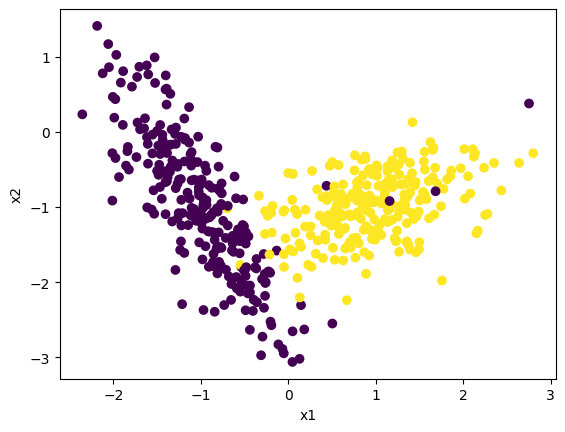

In [47]:
import matplotlib.pyplot as plt

#create a scatter plot of the feature values,coloring points based on class labels
plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [17]:
import numpy as np

#create a column vector of ones with shape(500,1)
ones = np.ones((500,1))

#stack the column vector of ones horizontally (along axis 1) with the original feature matrix x
X_ = np.hstack((ones,X))

#print the first 5 rows of the modified feature matrix
print(X_[:5])

[[ 1.          1.22167239 -0.4757541 ]
 [ 1.         -0.2292072  -1.85663378]
 [ 1.         -1.34913896  0.50458721]
 [ 1.          0.31402206 -1.62029248]
 [ 1.          1.13807877 -0.99148158]]


In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size = 0.2,random_state = 42)

#use gradient_descent funtion to optimize parameters for logistic regression
opt_theta, error_list = gradient_descent(X_train,y_train)

#Display the optimized parameters
opt_theta

array([[ 1.97220933, -1.97220933, -1.97220933, ...,  1.97220933,
         1.97220933,  1.97220933],
       [-0.17941749,  0.17941749,  0.17941749, ..., -0.17941749,
        -0.17941749, -0.17941749],
       [-1.35149631,  1.35149631,  1.35149631, ..., -1.35149631,
        -1.35149631, -1.35149631]])

**SIMULATION USING SKLEARN**

In [49]:
from sklearn.linear_model import LogisticRegression

#create a logistic model instance
logistic = LogisticRegression()

#fit the model to the training data
logistic.fit(X_train,y_train)

LogisticRegression()

In [50]:
logistic.intercept_

array([1.46952407])

In [51]:
logistic.coef_

array([[-3.17062293e-06,  3.89591876e+00,  8.50972735e-01]])

**MODEL PERFORMANCE**

1) Accuracy = measures the proportion of correctly predicted instances out of total number of instances => TP+TN/(TP+TN+FP+FN)

2) Precision = focuses on the relevance of positive predictions,indicating how many of the predicted positive cases are truly positive => TP/(TP+FP)

3) Recall = Model's ability to capture all positive instances in the data set irrespective of the number of false negatives
recall = TP/(TP+FN)

4) F-score = TP/(TP+0.5*(FP+FN))
 In logistic regression, the F-score (also known as the F1-score) is a measure of a model's accuracy, particularly in binary classification tasks

 F1 score = 2 X precision x recall/(precision +recall)

 *)The F1-score provides a balance between precision and recall. It ranges from 0 to 1, where a higher value indicates better performance. It's especially useful when you have an imbalanced dataset (i.e., the number of samples in each class is significantly different), as it considers both false positives and false negatives.

 *)In logistic regression, you can calculate the F1-score using the predicted probabilities and the threshold for classification. Typically, a probability above 0.5 is considered as class 1, and below 0.5 is considered as class 0. However, you can adjust this threshold depending on the specific requirements of your problem.

 *)It's important to note that the F1-score is appropriate only for binary classification problems. For multi-class classification problems, you can use variants such as the micro-F1 score or macro-F1 score, which aggregate the F1-scores for each class.

5) specificity : opposite of recall : TN/(TN+FP)

In [52]:
# Predict the class labels for the testing data using the trained logistic regression model
y_pred = logistic.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

#calculating confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix


array([[47,  3],
       [ 2, 48]])

In [62]:
#calculate accuracy score

accuracy = accuracy_score(y_test,y_pred)
accuracy


0.95

In [55]:
from sklearn.metrics import precision_score, recall_score




In [58]:
precision_score(y_test,y_pred)





0.9411764705882353

In [57]:
recall_score(y_test,y_pred)

0.96

In [59]:
y_pred


array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [63]:
#predicted class probabilities for the testing data using the trained logistic regression model

prob = logistic.predict_proba(X_test)
prob[1]


array([0.01821833, 0.98178167])

**SIMULATION OF LOGISTIC REGRESSION ASSUMPTIONS**

In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [65]:
#set random seed for reproducibility
np.random.seed(42)

#no of samples
n_samples = 1000

#generate independent variables
X1 = np.random.normal(0,1,n_samples)
X2 = np.random.normal(0,1,n_samples)
X3 = np.random.normal(0,1,n_samples)

#generate correlated independent variables
X4 = 0.5*X1 + 0.5*X2 + np.random.normal(0,0.2,n_samples) # X1 and X2
X5 = -0.5*X1 + 0.5*X3 + np.random.normal(0,0.2,n_samples)# X1 and X3

#generate dependent variable
#assume a linear relationship with some noise
log_odds = 0.5 + 0.3*X1 + 0.4*X2 - 0.2*X3 + 0.1*X4 + 0.2*X5 + np.random.normal(0,0.5,n_samples)

#convert log_odds to probability using logistic or sigmoid function
probabilities = 1/(1+np.exp(-log_odds))

#convert probabilities to binary outcome
y = np.random.binomial(1,probabilities)

#create DataFrame
df = pd.DataFrame({'dependent_variable' : y,
                   'independent_variable_1' : X1,
                   'independent_variable_2' : X2,
                   'independent_variable_3' : X3,
                   'independent_variable_4' : X4,
                   'independent_variable_5' : X5,})

**Key Assumptions for implementing Logistic regression**

In [66]:
#1)The dependent/response variable is binary/dichotomous
#check unique values of the dependent variable
print(df['dependent_variable'].unique())

[1 0]


In [67]:
#2)Little or no multicollinearity b/w predictor/explanatory variables
#calculate VIF for multicollinearity

def calculate_vif(X):
  vif_data = pd.DataFrame()
  vif_data["Features"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

  return vif_data

X = df[['independent_variable_1','independent_variable_2','independent_variable_3','independent_variable_4','independent_variable_5']]

vif_data = calculate_vif(X)

print(vif_data)


                 Features        VIF
0  independent_variable_1  13.098294
1  independent_variable_2   6.678743
2  independent_variable_3   7.322949
3  independent_variable_4  11.863495
4  independent_variable_5  13.302297


In [68]:
#3)linear relationship of independent variables to log odds
#check for linearity using logistic regression summary

X = df[['independent_variable_1','independent_variable_2','independent_variable_3','independent_variable_4','independent_variable_5']]

X = sm.add_constant(X)

logit_model = sm.Logit(df['dependent_variable'],X)

result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.633089
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:     dependent_variable   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Mar 2024   Pseudo R-squ.:                 0.05580
Time:                        08:17:07   Log-Likelihood:                -633.09
converged:                       True   LL-Null:                       -670.50
Covariance Type:            nonrobust   LLR p-value:                 1.010e-14
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4301      0.067      6.377      0.000       0.298      

4)  **Prefers large sample size**: Logistic regression analysis yields reliable, robust, and valid results when a larger sample size of the dataset is considered.

This assumption can be validated by taking into account a minimum of 10 cases considering the least frequent outcome for each estimator variable.

Let's consider a case where you have three predictor variables, and the probability of the least frequent outcome is 0.30. Here, the sample size would be (10*3) / 0.30 = 100.

5)**Problem with extreme outliers** : Another critical assumption of logistic regression is the requirement of no extreme outliers in the dataset.

This assumption can be verified by calculating Cook's distance (Di) for each observation to identify influential data points that may negatively affect the regression model.

In situations when outliers exist, one can implement the following solutions:

*)Eliminate or remove the outliers
*)Consider a value of mean or median instead of outliers, or
*)Keep the outliers in the model but maintain a record of them while reporting the regression results

6) **should have independent observations** : This assumption states that the dataset observations should be independent of each other. The observations should not be related to each other or emerge from repeated measurements of the same individual type.

The assumption can be verified by plotting residuals against time, which signifies the order of observations. The plot helps in determining the presence or absence of a random pattern. If a random pattern is present or detected, this assumption may be considered violated.



     